In [105]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

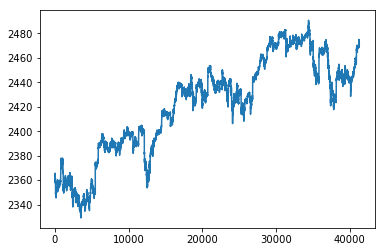

array([[ 2363.6101,    42.33  ,   143.68  , ...,    63.86  ,   122.    ,
           53.35  ],
       [ 2364.1001,    42.36  ,   143.7   , ...,    63.74  ,   121.77  ,
           53.35  ],
       [ 2362.6799,    42.31  ,   143.6901, ...,    63.75  ,   121.7   ,
           53.365 ],
       ..., 
       [ 2470.03  ,    44.74  ,   164.01  , ...,    76.88  ,   114.31  ,
           62.685 ],
       [ 2471.49  ,    44.71  ,   163.88  , ...,    76.83  ,   114.23  ,
           62.6301],
       [ 2471.49  ,    44.74  ,   163.98  , ...,    76.81  ,   114.28  ,
           62.68  ]])

In [106]:
data= pd.read_csv('SP500data_stocks.csv')
data= data.drop(['DATE'],1)

#dimension of dataset
n=data.shape[0]
p=data.shape[1]

%matplotlib inline
plt.plot(data['SP500'])
plt.show()

data=data.values
data


In [107]:
#training and test data
train_start=0
train_end=int(np.floor(0.8*n))
test_start= train_end
test_end=n
data_train=data[np.arange(train_start,train_end),1]
data_test=data[np.arange(test_start,test_end),1]
print(data_train)
print(data_test)

[ 42.33  42.36  42.31 ...,  50.54  50.52  50.52]
[ 50.48    50.4799  50.49   ...,  44.74    44.71    44.74  ]


In [108]:
#Scale data
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)
print(data_train.shape)
print(data_test.shape)

#build x and y
x_train = data_train[1:]
y_train = data_train[0]
x_test = data_test[1:]
y_test = data_test[0]
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
y_test

(33012,)
(8254,)
(33011,) () (8253,) ()


C:\Users\chiehhsi.lin\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\chiehhsi.lin\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\chiehhsi.lin\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays a

0.70721876145108054

In [109]:
#Initializer
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

In [110]:
#Variable
n_stocks = 500
n_neurons_1 = 1024
n_neurons_2 = 512
n_neurons_3 = 256
n_neurons_4 = 128
n_target = 1

# Layer 1: Variables for hidden weights and biases
W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
# Layer 2: Variables for hidden weights and biases
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
# Layer 3: Variables for hidden weights and biases
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
# Layer 4: Variables for hidden weights and biases
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

# Output layer: Variables for output weights and biases
W_out = tf.Variable(weight_initializer([n_neurons_4, n_target]))
bias_out = tf.Variable(bias_initializer([n_target]))

In [111]:
#placeholder
x=tf.placeholder(dtype='float32',shape=[None,n_stocks])
y=tf.placeholder(dtype='float32',shape=[None])
print(x.shape,y.shape)

(?, 500) (?,)


In [112]:
# Hidden layer
hidden_1 = tf.nn.relu(tf.add(tf.matmul(x, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

# Output layer (must be transposed)
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

In [113]:
#cost function
mse= tf.reduce_mean(tf.squared_difference(out,y))

In [114]:
#Optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

0.707218761451


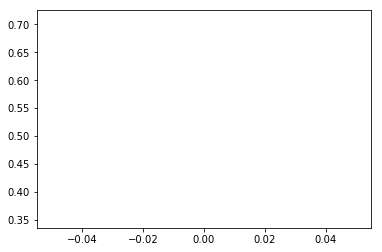

TypeError: object of type 'numpy.float64' has no len()

In [115]:
#%matplotlib inline
# Make Session
net = tf.Session()
# Run initializer
net.run(tf.global_variables_initializer())

print(y_test)
# Setup interactive plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test*0.5)
plt.show()

# Number of epochs and batch size
epochs = 10
batch_size = 256

for e in range(epochs):

# Shuffle training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    x_train = x_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

# Minibatch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = x_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        # Run optimizer with batch
        net.run(opt, feed_dict={x: batch_x, y: batch_y})
               
        # Show progress
        if np.mod(i, 5) == 0:
            # Prediction
            pred = net.run(out, feed_dict={x: x_test})
            line2.set_ydata(pred)
            plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
            file_name = 'img/epoch_' + str(e) + '_batch_' + str(i) + '.jpg'
            plt.savefig(file_name)
            plt.pause(0.01)
#Print final MSE after Training
#pred= net.run(out,feed_dict={x:x_test})
#mse_final = net.run(mse, feed_dict={x: pred, y: y_test})
#print(mse_final)